# Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
from scipy import signal
from matplotlib import style

# Wave Class

In [2]:
class Waves:
    
    def draw_periodic_signals(self, arr, title, xlabel, ylabel, pulse_height, sampling_rate):
        
        ''' Draws a periodic signal based on the provided array of values.
        Parameters:
        arr (list): Array of values representing the signal.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        pulse_height (float): Height of the pulse in the signal.
        sampling_rate (int): Sampling rate for the signal.
        '''
        
        t = np.linspace(-4, 4, sampling_rate, endpoint=True)
        plt.style.use('fast')
        plt.figure(figsize=(10, 5))
        plt.grid(color='black', linestyle='-', linewidth=0.1)
        plt.plot(t,arr)
        plt.title(title)
        plt.axhline(y=0, color='black',linewidth=0.5)
        plt.axvline(x=0, color='black',linewidth=0.5)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.ylim(-0.4, pulse_height + 0.4)
        plt.xlim(-4.5, 4.5)
        plt.tight_layout()
        plt.show()
    

    def square_pulse(self,periodic_time,title,x_axis_label,y_axis_label,horizontal_shift,pulse_height):
        t = np.linspace(-3.9, 3.9, 1000, endpoint=True)
        arr=[((1+num)//2)*pulse_height for num in signal.square(1/periodic_time * np.pi * 1 * (t-horizontal_shift))]
        self.draw_periodic_signals(arr,title,x_axis_label,y_axis_label,pulse_height,1000)

        """To form a square pulse"""

        #   wave=Waves()
        #   wave.square_pulse(Enter periodic time,Enter Title,Enter X axis label,Enter Y axis label,Enter horizontal shift,Enter pulse height)

    def sawtooth_pulse(self,periodic_time,title,x_axis_label,y_axis_label,horizontal_shift,pulse_height):
        t = np.linspace(-3.9, 3.9, 500)
        arr=[(1+num)*pulse_height/2 for num in signal.sawtooth(2/periodic_time * np.pi * 1 * (t-horizontal_shift))]
        self.draw_periodic_signals(arr,title,x_axis_label,y_axis_label,pulse_height,500)
    

        """To form a sawtooth pulse"""

        #   wave=Waves()
        #   wave.sawtooth_pulse(Enter periodic time,Enter Title,Enter X axis label,Enter Y axis label,Enter horizontal shift,Enter pulse height)

    def enlarged_impulse_1(self):
        plt.figure(figsize=(6, 4))
        y_values=[0,0,1,1,1,0,0]
        x_values=[-2,-1,-1,0,1,1,2]
        plt.plot(x_values,y_values)
        plt.ylim(-0.2,2)
        plt.axhline(y=0, color='black',linewidth = 0.5)
        plt.axvline(x=0, color='black',linewidth = 0.5)
        plt.xlabel("time")
        plt.title("$\delta(t)$")
        y_labels=[0,0,"1/ $\Delta$","1/ $\Delta$","1/ $\Delta$",0,0]
        labels=["-$\Delta$","-$\Delta$/2","-$\Delta$/2","0","$\Delta$/2","$\Delta$/2","$\Delta$"]
        plt.xticks(x_values,labels,rotation="horizontal")
        plt.yticks(y_values,y_labels,rotation="horizontal")
        plt.show()

    def draw_hann_pulse(self,shift):
        plt.figure(figsize=(6, 4))
        plt.ylim(-0.2,2)
        plt.xlim(-5,5)
        plt.axhline(y=0, color='black',linewidth = 0.5)
        plt.axvline(x=0, color='black',linewidth = 0.5)
        win = signal.windows.hann(50)
        x_values=np.linspace(-1-shift,(1-shift),num=50)
        plt.plot(x_values,win)

        """To form a hann pulse"""

        #   wave=Waves()
        #   wave.draw_hann_pulse(Enter shift)

    
    def convolve_square_and_hann(self):
        win = signal.windows.hann(50)
        # win=np.repeat([0., 1., 0.], 50)
        sig = np.repeat([0., 1., 0.], 100)
        xvalues=np.linspace(-400,400,300)
        x2values=np.linspace(-100,100,50)
        filtered = signal.convolve(sig, win, mode='same') / sum(win)
        fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True,sharey=True)
        ax_orig.plot(xvalues,sig)
        ax_orig.set_title('Original pulse')
        ax_orig.axhline(y=0, color='black',linewidth = 0.5)
        ax_orig.axvline(x=0, color='black',linewidth = 0.5)
        ax_orig.margins(0, 0.2)
        ax_win.axhline(y=0, color='black',linewidth = 0.5)
        ax_win.axvline(x=0, color='black',linewidth = 0.5)
        ax_win.plot(x2values,win)
        ax_win.set_title('Input response')
        ax_win.margins(0, 0.2)
        ax_filt.plot(xvalues,filtered)
        ax_filt.set_title('Convoled signal')
        ax_filt.axhline(y=0, color='black',linewidth = 0.5)
        ax_filt.axvline(x=0, color='black',linewidth = 0.5)
        ax_filt.margins(0, 0.2)
        fig.tight_layout()
        fig.show()

        """To use convole function for square and a hann function"""
        #   wave=Waves()
        #   wave.convolve_square_and_hann()

## Example Usage 

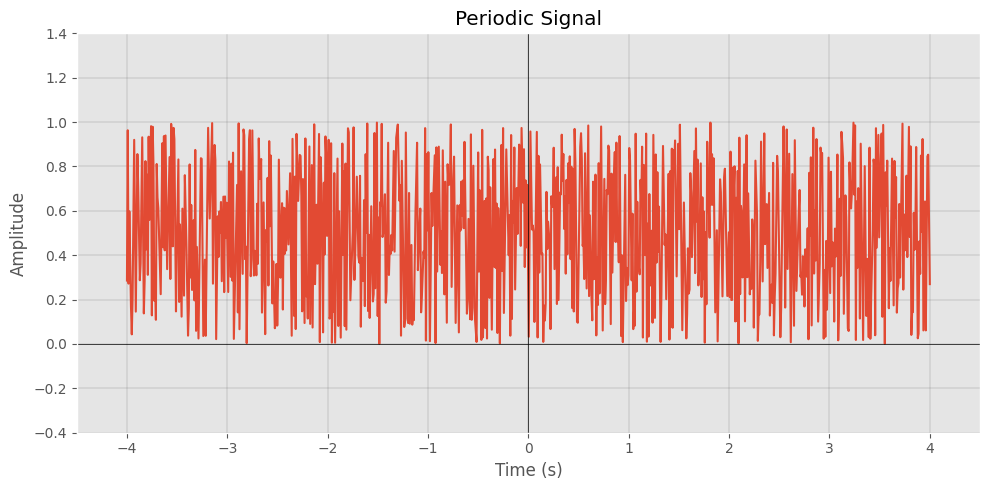

In [48]:
t = Waves()

# Example usage:
arr = np.random.rand(1000)  # Example array of random values
t.draw_periodic_signals(arr, 'Periodic Signal', 'Time (s)', 'Amplitude', 1, 1000)

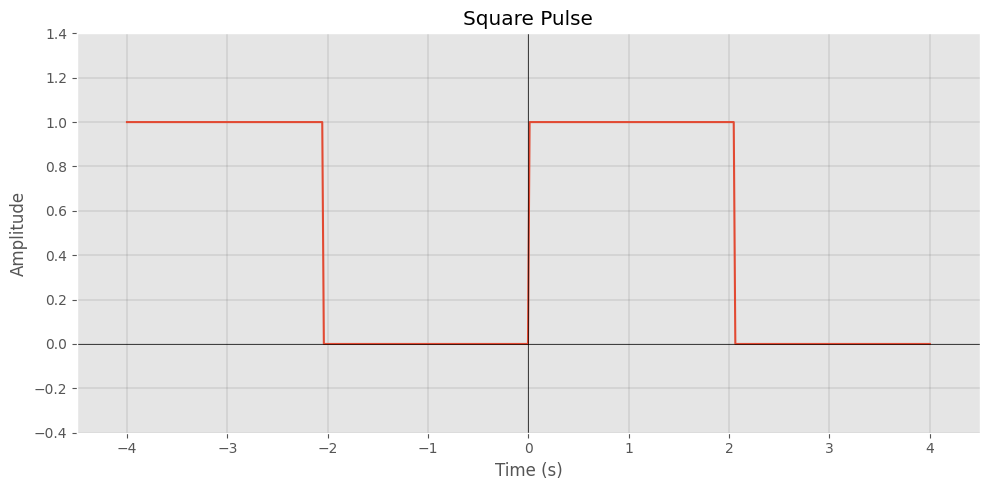

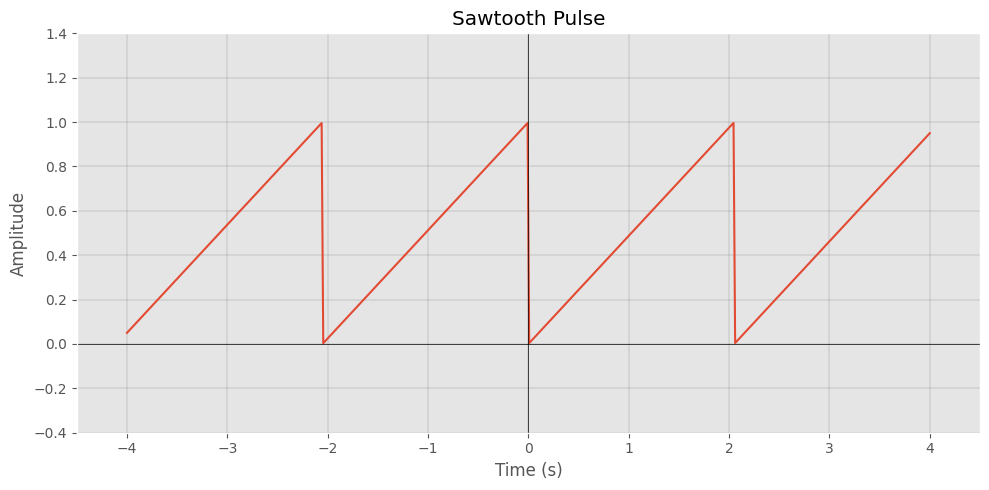

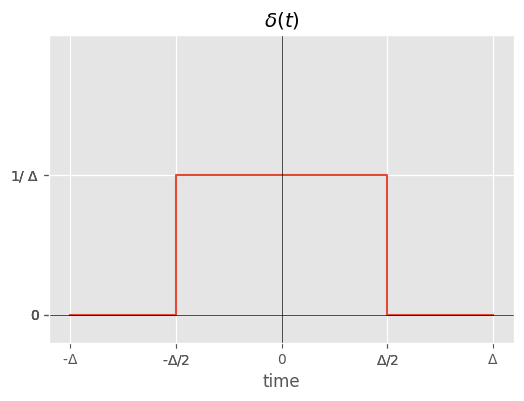

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_3240\1336733197.py:108: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


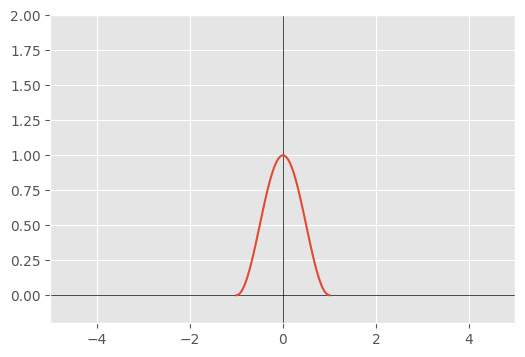

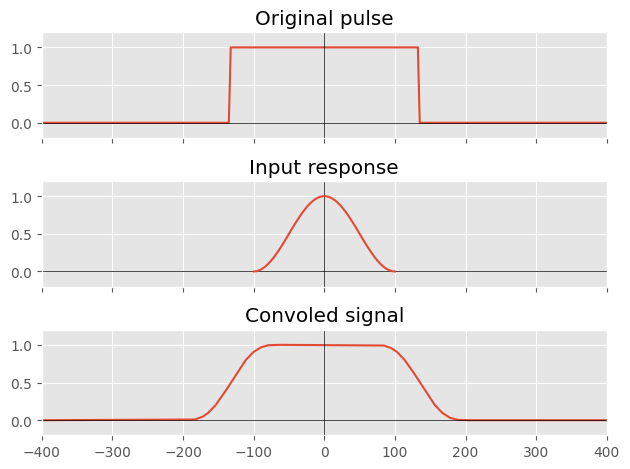

In [49]:
m = Waves()

# Example usage of square pulse
m.square_pulse(2, 'Square Pulse', 'Time (s)', 'Amplitude', 0, 1)

# Example usage of sawtooth pulse
m.sawtooth_pulse(2, 'Sawtooth Pulse', 'Time (s)', 'Amplitude', 0, 1)

# Example usage of enlarged impulse
m.enlarged_impulse_1()

# Example usage of hann pulse
m.draw_hann_pulse(0)

# Example usage of convolve square and hann
m.convolve_square_and_hann()



# Phase 01: Introduction 

## Signal Classification

### Continuous Vs Discrete Signals

| **Continuous-Time**          | **Discrete-Time**                   |
| ---------------------------- | ----------------------------------- |
| Defined for all time `t ∈ ℝ` | Only at specific time steps `n ∈ ℤ` |
| Think: analog                | Think: digital samples              |
| e.g. sin(t), voice, ECG      | e.g. sampled audio, image pixels    |


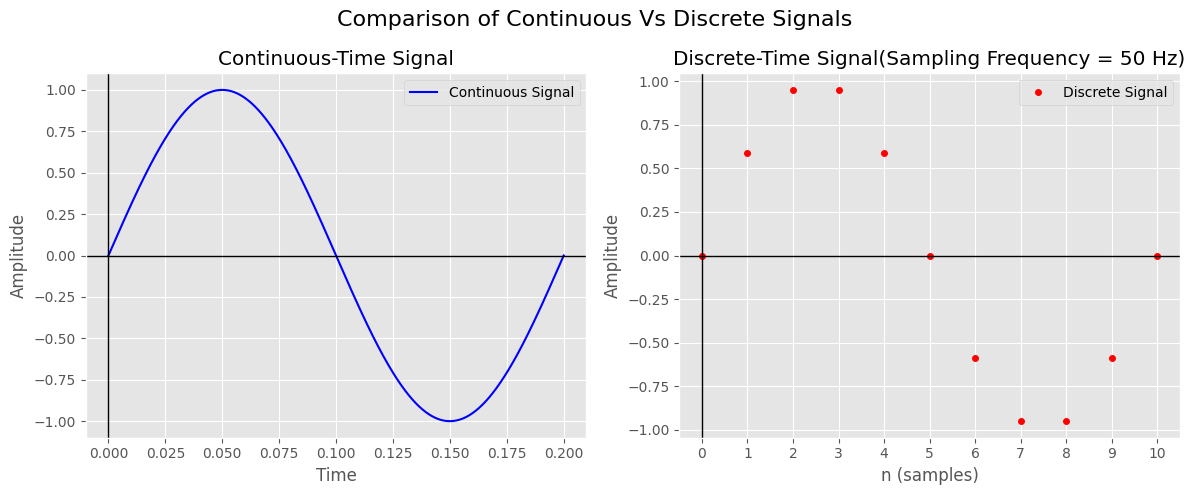

In [6]:
# period of the continuous signal
T = 1 / 5  # 5 Hz frequency

#continuous function definition
t = np.linspace(0,0.2, 1000)
x_ct = np.sin(2 * np.pi * t / T)

#discrete function definition

# if the sampling frequency is 50 Hz ; T/10 = 0.02 seconds
n_50 = np.arange(0,11)  # 10 samples
x_dt_50 = np.sin(2 * np.pi * 0.1 * n_50) 


#plot both signals

plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(t, x_ct, label='Continuous Signal', color='blue')
plt.title('Continuous-Time Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(n_50, x_dt_50, 'ro', label='Discrete Signal', markersize=4)
plt.title('Discrete-Time Signal(Sampling Frequency = 50 Hz)')
plt.xticks(n_50)  # Set x-ticks to match discrete samples
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)  
plt.legend(loc='upper right')


plt.suptitle('Comparison of Continuous Vs Discrete Signals', fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
style.use('ggplot')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Additional: Effect of sampling frequency

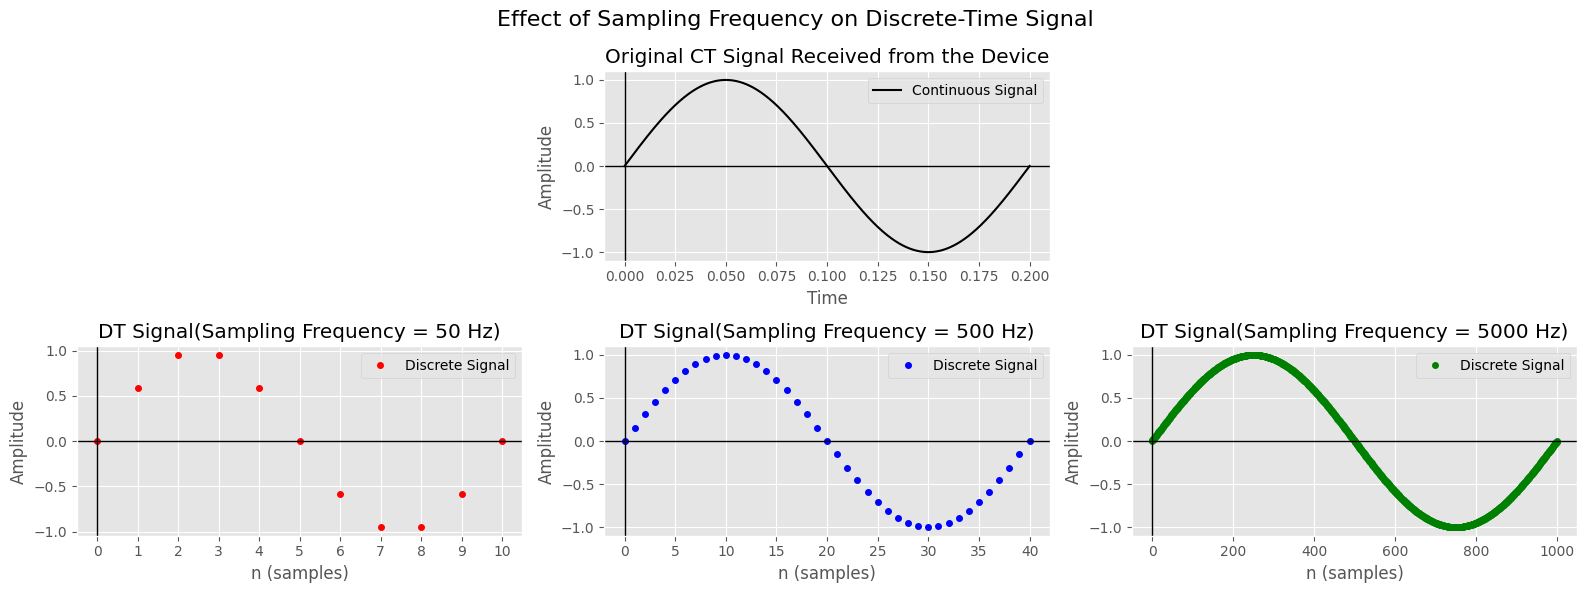

In [8]:
# period of the continuous signal
T = 1 / 5  # 5 Hz frequency

#continuous function definition
t = np.linspace(0,0.2, 1000)
x_ct = np.sin(2 * np.pi * t / T)

#discrete function definition

# if the sampling frequency is 50 Hz ; T/10 = 0.02 seconds
n_50 = np.arange(0,11)  # 10 samples
x_dt_50 = np.sin(2 * np.pi * 0.1 * n_50) 

# if the sampling frequency is 100 Hz ; T/40 = 0.005 seconds
n_500 = np.arange(0, 41)  # 40 samples
x_dt_500 = np.sin(2 * np.pi * 0.025 * n_500)

# if the sampling frequency is 5000 Hz ; T/1000 = 0.0002 seconds
n_5000 = np.arange(0, 1001)  # 1000 samples
x_dt_5000 = np.sin(2 * np.pi * 0.001 * n_5000)

#plot both signals

plt.figure(figsize=(16,6))


plt.subplot(2, 3, 2)
plt.plot(t, x_ct, label='Continuous Signal', color='black')
plt.title('Original CT Signal Received from the Device') 
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.legend(loc='upper right')

plt.subplot(2, 3, 4)
plt.plot(n_50, x_dt_50, 'ro', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 50 Hz)')
plt.xticks(n_50)  # Set x-ticks to match discrete samples
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.legend(loc='upper right')

plt.subplot(2, 3, 5)
plt.plot(n_500, x_dt_500, 'bo', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 500 Hz)')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.legend(loc='upper right')

plt.subplot(2, 3, 6)
plt.plot(n_5000, x_dt_5000, 'go', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 5000 Hz)')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.legend(loc='upper right')

plt.suptitle('Effect of Sampling Frequency on Discrete-Time Signal', fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.grid(True)
plt.tight_layout()
plt.show()



### Deterministic vs Random

| **Deterministic**        | **Random**                    |
| ------------------------ | ----------------------------- |
| Fully predictable        | Contains randomness           |
| Always same output       | Changes on every trial        |
| e.g. sin(t), square wave | e.g. noise, stock prices, EEG |


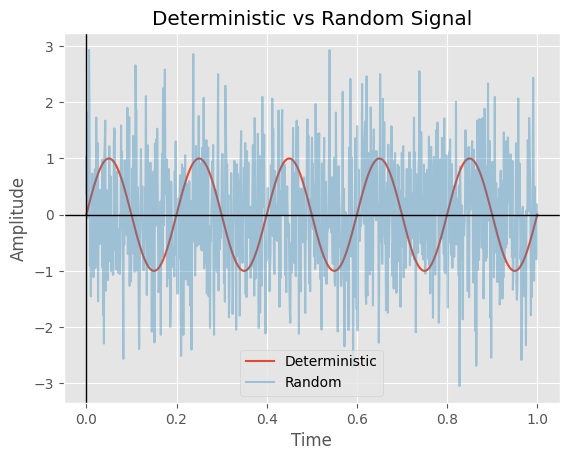

In [9]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)
deterministic = np.sin(2 * np.pi * 5 * t)
random_signal = np.random.randn(1000)


plt.plot(t, deterministic, label='Deterministic')
plt.plot(t, random_signal, label='Random', alpha=0.4)
plt.legend()
plt.title("Deterministic vs Random Signal")
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


### Even vs Odd Signals

- __Even__ : `x(t) = x(-t)` → symmetric
- __Odd__ : `x(t) = -x(-t)` → antisymmetric

__Use__ : Decompose signals for fourier analysis

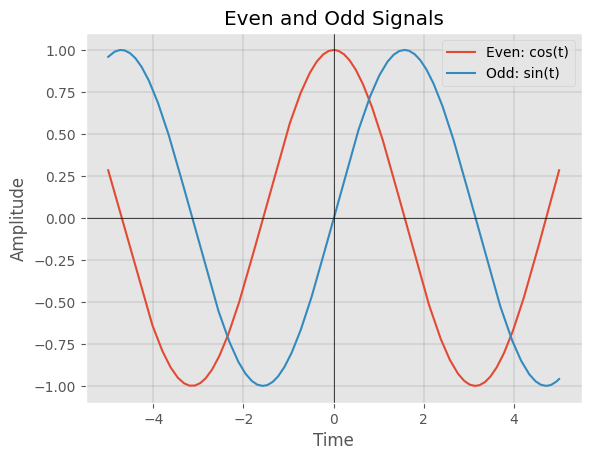

In [52]:
t = np.linspace(-5, 5, 500)
x = np.cos(t)   # Even
y = np.sin(t)   # Odd

plt.plot(t, x, label='Even: cos(t)')
plt.plot(t, y, label='Odd: sin(t)')
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title("Even and Odd Signals")
plt.show()


### periodic vs Aperiodic signals

- __Periodic__ : Repeats every T, means `x(t) = x(t+T)`
- __Aperiodic__ : Doesn't repeat, means `x(t) != x(t+T)`

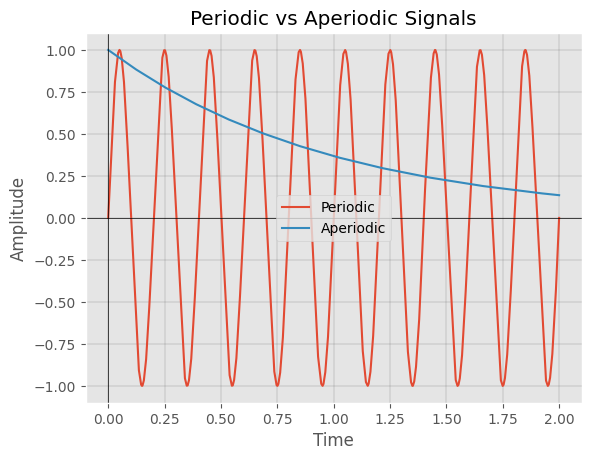

In [54]:
t = np.linspace(0, 2, 1000)
periodic = np.sin(2 * np.pi * 5 * t)
aperiodic = np.exp(-t)

plt.plot(t, periodic, label="Periodic")
plt.plot(t, aperiodic, label="Aperiodic")
plt.legend()
plt.title("Periodic vs Aperiodic Signals")
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


### Unit Step Function & Impulse Function

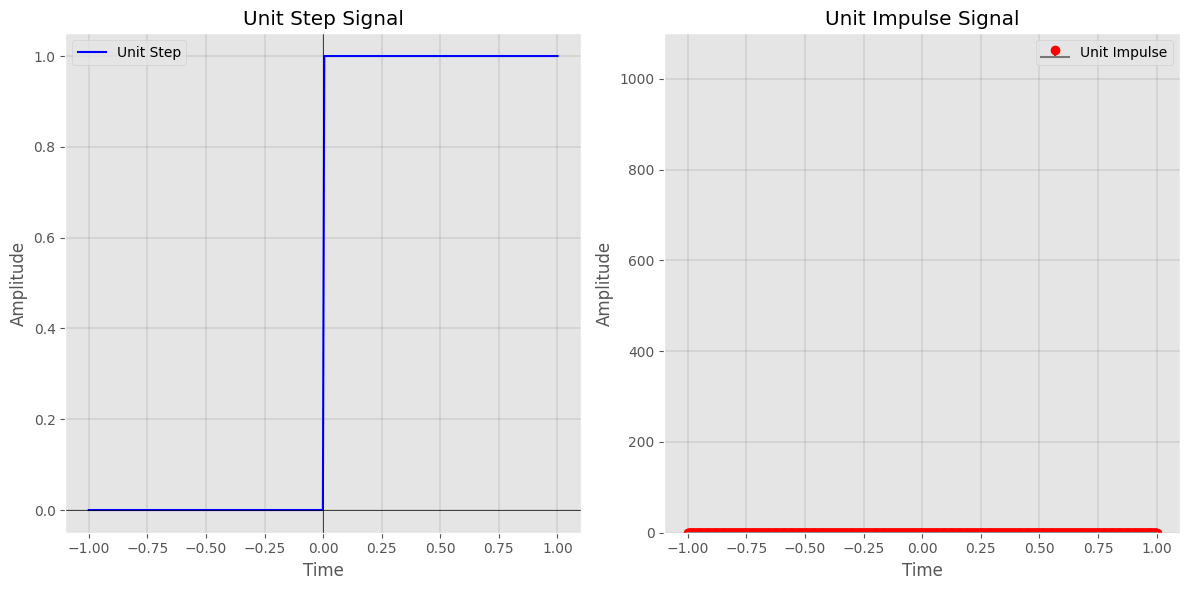

In [61]:
def unit_step(t):
    return np.where(t >= 0, 1, 0)

def unit_impulse(t, epsilon=1e-3):
    return np.where(np.abs(t) < epsilon, 1/epsilon, 0)

t = np.linspace(-1, 1, 1000)
step_signal = unit_step(t)
impulse_signal = unit_impulse(t)  # Apply to entire time array

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, step_signal, label='Unit Step', color='blue')
plt.title('Unit Step Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.legend()

plt.subplot(1, 2, 2)
# Use stem plot for clearer visualization of the impulse
plt.stem(t, impulse_signal, label='Unit Impulse', linefmt='r-', markerfmt='ro')
plt.title('Unit Impulse Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.grid(color='black', linestyle='-', linewidth=0.1)
plt.legend()
plt.ylim(0, 1100)  # Adjust y limits to show the impulse peak

plt.tight_layout()
plt.show()

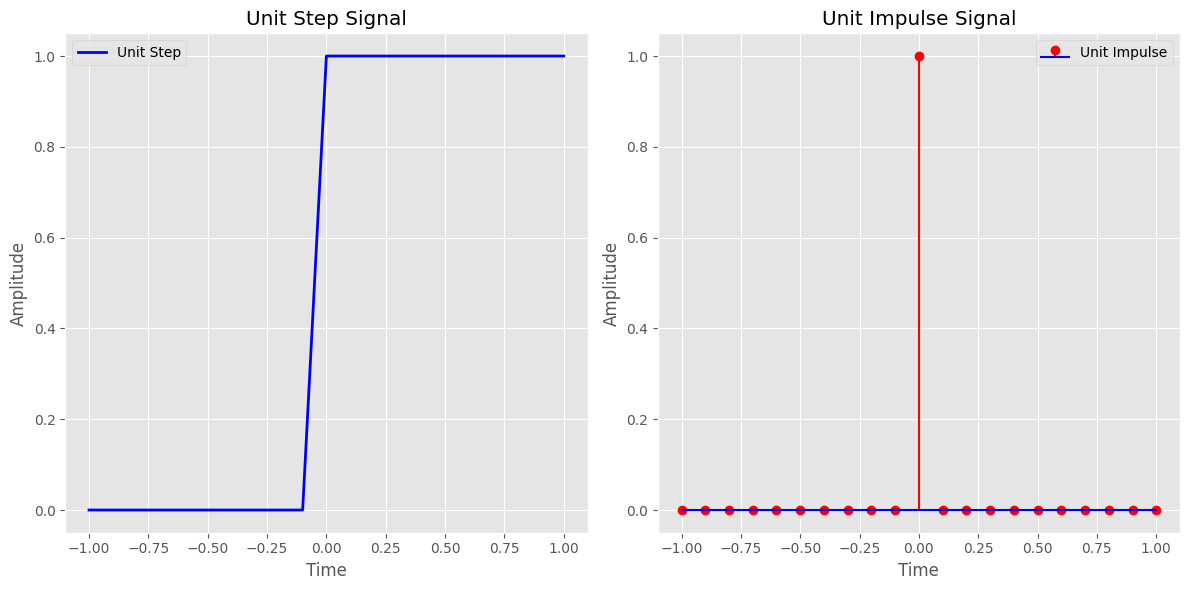

In [ ]:
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# Create time array focusing on important region
t = np.linspace(-1, 1, 10)  # Fewer points for clarity

# For impulse, use true discrete representation
impulse_signal = np.zeros_like(t)
impulse_signal[t == 0] = 1  # Only exactly at t=0

# If exact 0 isn't in array, find closest point
if not np.any(t == 0):
    idx = np.argmin(np.abs(t))
    impulse_signal[idx] = 1

plt.figure(figsize=(12, 6))

# Step signal plot
plt.subplot(1, 2, 1)
plt.plot(t, unit_step(t), label='Unit Step', color='blue', linewidth=2)
plt.title('Unit Step Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Impulse signal plot
plt.subplot(1, 2, 2)
plt.stem(t, impulse_signal, label='Unit Impulse', linefmt='r-', markerfmt='ro', basefmt='b-')
plt.title('Unit Impulse Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude') 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

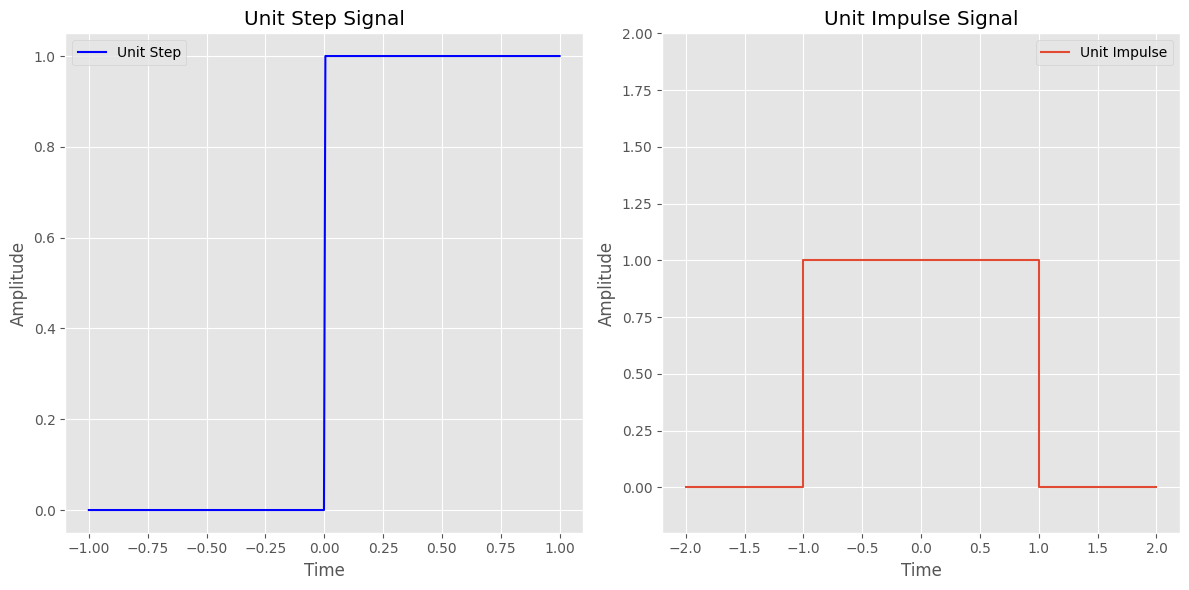

In [63]:
# Create instance of Waves class
wave = Waves()

# Create figure with both step and impulse
plt.figure(figsize=(12, 6))

# Plot step function
t = np.linspace(-1, 1, 1000)
plt.subplot(1, 2, 1)
plt.plot(t, np.where(t >= 0, 1, 0), label='Unit Step', color='blue')
plt.title('Unit Step Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Use your existing method for impulse
plt.subplot(1, 2, 2)
y_values=[0, 0, 1, 1, 1, 0, 0]
x_values=[-2, -1, -1, 0, 1, 1, 2]
plt.plot(x_values, y_values)
plt.ylim(-0.2, 2)
plt.title('Unit Impulse Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(['Unit Impulse'])

plt.tight_layout()
plt.show()

## Convolution

In [ ]:
a = [1,2,3]
b = [2,3,4]


#numpy 

convo = np.convolve(a,b)
print(convo)

#scipy 

convo_sci = signal.convolve(a,b)
print(convo_sci)


# fft
n = len(a) + len(b) - 1
f_a = np.fft.fft(a, n)
f_b = np.fft.fft(b, n)
f_c = f_a * f_b
convo_fft = np.fft.ifft(f_c)
print(np.real(convo_fft))

# multiplication of two huge integrs usinf fft




[ 2  7 16 17 12]
[ 2  7 16 17 12]
[ 2.  7. 16. 17. 12.]


## FFT (fast fourier transform)


### Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift
import scipy.signal as signal

### Using FFT for Multiplying Huge Integers

Let's look how to implement a Fast Fourier Transform (FFT) algorithm for multiplying extremely large integers (order of 10^14 or larger).

## Step-by-Step Plan:
1. Break down large integers into smaller chunks (digits in some base)
2. Convert these chunks into polynomial coefficients
3. Use FFT to multiply the polynomials efficiently
4. Process the result with carry handling
5. Convert back to integer format
---

1. Break down large integers into smaller chunks

In [ ]:
def split_into_chunks(num, base = 10000):
    """
    Split a large integer into chunks using a given base.
    Returns coefficients in little-endian order (least significant digit first).
    
    Example: 123456789 with base 10000 becomes [6789, 2456, 1]
    """
    
    if num == 0:
        return [0]
    
    chunks = []
    
    while num > 0:
        chunks.append(num%base)
        num //= base 
        
    return chunks 



[6789, 2345, 1]


`Polynomial can be shown as follows:`

$1.10000^2 + 2345.10000^1+6789.10000^0$

__so the coeffiecients are__:
$1, 2345, 6789$


2. Use FFT to multiply polynomials efficiently.

In [22]:
def mult_fft(a, b):
    """
    Multiply two polynomials using FFT.
    
    Args:
        a: List of coefficients for first polynomial
        b: List of coefficients for second polynomial
    
    Returns:
        Product of polynomials as a list of coefficients
    """
    
    # making a list of zeros of length larger than len(a)+len(b) with equal length 
    n = 1
    while n < len(a)+len(b)-1:
        n*=2

    # padding zeros to make the length of the two lists equal
    a_pad = a + ([0]*(n-len(a)))
    b_pad = b + ([0]*(n-len(b)))

    #compute FFT of both
    a_fft = np.fft.fft(a_pad)
    b_fft = np.fft.fft(b_pad)
    
    # multiply the ffts
    
    c_fft = a_fft * b_fft
    
    # compute the inverse FFT of the product
    c = np.fft.ifft(c_fft)
    
    # convert to real integers
    return [round(c[i].real) for i in range(len(a)+len(b)-1)]


    

3. Process the result with carry handling to obtain the final output number

In [25]:
def process_carry(chunks, base=10000):
    """
    Process the carries for the result of polynomial multiplication.
    
    Args:
        chunks: List of coefficients from FFT multiplication
        base: Base used for chunking
    
    Returns:
        List of properly carried coefficients
    """
    
    carry = 0
    result = []
    
    for value in chunks:
        
        # add the carry to the current value
        value += carry
        
        #calculate the new carry and the number
        result.append(value % base)
        carry = value // base
        
    if carry > 0 :
        result.append(carry)
        
    return result
    
    

4. Convert back to interger format

In [27]:
def reconstruct_int(chunks, base =10000):
    """
    Reconstruct an integer from its chunks.
    
    Args:
        chunks: List of integer chunks in little-endian order
        base: Base used for chunking
    
    Returns:
        The reconstructed integer
    """
    
    result = 0
    
    for i in range(len(chunks)-1,-1,-1):
        result = result*base + chunks[i]
    return result

#### Dora Learns Multiplication (coders v10.0)



In [36]:
import numpy as np

#inputs 
num = int(input())

int_list = list(map(int, input().split()))

def split_into_chunks(num, base = 10000):
    """
    Split a large integer into chunks using a given base.
    Returns coefficients in little-endian order (least significant digit first).
    
    Example: 123456789 with base 10000 becomes [6789, 2456, 1]
    """
    
    if num == 0:
        return [0]
    
    chunks = []
    
    while num > 0:
        chunks.append(num%base)
        num //= base 
        
    return chunks 


def mult_fft(a, b):
    """
    Multiply two polynomials using FFT.
    
    Args:
        a: List of coefficients for first polynomial
        b: List of coefficients for second polynomial
    
    Returns:
        Product of polynomials as a list of coefficients
    """
    
    # making a list of zeros of length larger than len(a)+len(b) with equal length 
    n = 1
    while n < len(a)+len(b)-1:
        n*=2

    # padding zeros to make the length of the two lists equal
    a_pad = a + ([0]*(n-len(a)))
    b_pad = b + ([0]*(n-len(b)))

    #compute FFT of both
    a_fft = np.fft.fft(a_pad)
    b_fft = np.fft.fft(b_pad)
    
    # multiply the ffts
    
    c_fft = a_fft * b_fft
    
    # compute the inverse FFT of the product
    c = np.fft.ifft(c_fft)
    
    # convert to real integers
    return [round(c[i].real) for i in range(len(a)+len(b)-1)]


def process_carry(chunks, base=10000):
    """
    Process the carries for the result of polynomial multiplication.
    
    Args:
        chunks: List of coefficients from FFT multiplication
        base: Base used for chunking
    
    Returns:
        List of properly carried coefficients
    """
    
    carry = 0
    result = []
    
    for value in chunks:
        
        # add the carry to the current value
        value += carry
        
        #calculate the new carry and the number
        result.append(value % base)
        carry = value // base
        
    if carry > 0 :
        result.append(carry)
        
    return result

def reconstruct_int(chunks, base =10000):
    """
    Reconstruct an integer from its chunks.
    
    Args:
        chunks: List of integer chunks in little-endian order
        base: Base used for chunking
    
    Returns:
        The reconstructed integer
    """
    
    result = 0
    
    for i in range(len(chunks)-1,-1,-1):
        result = result*base + chunks[i]
    return result


for i in range(0,len(int_list),2):
    
    #construct the polynomial
    a = split_into_chunks(int_list[i])
    b = split_into_chunks(int_list[i+1])
    
    #multiply the polynomials
    c = mult_fft(a, b)
    
    #process the carry
    c_processed = process_carry(c)
    
    #reconstruct the integer
    result = reconstruct_int(c_processed)
    
    #output the result
    print(result)
    



In [38]:
n = int(input("enter a number"))

lis = list(map(int, input().split()))
print(lis)

[12345, 67890, 67328, 365122, 923178, 174369]
